In [1]:
import pickle
import numpy as np
import pandas as pd
import json

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras.metrics import Precision, Recall
import tensorflow.keras.backend as K
import seaborn as sns


import matplotlib.pyplot as plt

2023-06-25 04:05:35.871637: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-25 04:05:36.896793: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Load data

In [2]:
with open("data/X_train.pickle", "rb") as X_train_file, open(
    "data/X_test.pickle", "rb"
) as X_test_file, open("data/Y_train.pickle", "rb") as Y_train_file, open(
    "data/Y_test.pickle", "rb"
) as Y_test_file, open(
    "data/vocabulary.json", "rt"
) as vocabulary_file, open(
    "models/tweets_model.pickle", "rb"
) as model_file:
    X_test = pickle.load(X_test_file)
    X_train = pickle.load(X_train_file)
    Y_train = pickle.load(Y_train_file)
    Y_test = pickle.load(Y_test_file)
    vocabulary = json.load(vocabulary_file)
    model = pickle.load(model_file)

2023-06-25 04:05:40.198229: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-25 04:05:40.393008: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-25 04:05:40.393070: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-25 04:05:40.394747: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-25 04:05:40.394806: I tensorflow/compile

In [3]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

print(f"Y_train shape: {Y_train.shape}")
print(f"Y_test shape: {Y_test.shape}")

X_train shape: (32897, 5000)
X_test shape: (8225, 5000)
Y_train shape: (32897, 3)
Y_test shape: (8225, 3)


In [4]:
def from_categorical(matrix):
    return np.argmax(matrix, axis=1)

In [5]:
y_train = from_categorical(Y_train)
y_test = from_categorical(Y_test)

print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

y_train shape: (32897,)
y_test shape: (8225,)


In [6]:
features_names = list(vocabulary.keys())[:5000]
print(f"Number of features: {len(features_names)}")

Number of features: 5000


In [28]:
SHAP_NUM_OF_FEATURES = 100
SHAP_NUM_OF_TWEETS = 100

X_train_shap = X_train[:SHAP_NUM_OF_TWEETS, :SHAP_NUM_OF_FEATURES]
X_test_shap = X_test[:SHAP_NUM_OF_TWEETS, :SHAP_NUM_OF_FEATURES]

print(f"X_train_shape shape: {X_train_shap.shape}")
print(f"X_test_shape shape: {X_test_shap.shape}")
features_names_shap = features_names[:SHAP_NUM_OF_FEATURES]
print(f"Number of features: {len(features_names_shap)}")

X_train_shape shape: (100, 100)
X_test_shape shape: (100, 100)
Number of features: 100


In [27]:
import shap

In [30]:
explainer = shap.KernelExplainer(model, X_train)
shap_values = explainer.shap_values(X_test[:10], max_evals=2*5000+1)
shap_values.feature_names = features_names

2023-06-25 04:26:21.086822: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1315880000 exceeds 10% of free system memory.
Using 32897 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
  0%|          | 0/10 [00:00<?, ?it/s]

In [14]:
with open("data/shap_values.pickle", "wb") as shap_values_file:
    pickle.dump(shap_values, shap_values_file)

In [17]:
print(shap_values.feature_names)
print(shap_values.shape)

['realdonaldtrump', 'com', 'http', 'trump', 'great', 'thank', 'twitter', 'presid', 'peopl', 'get', 'pic', 'donald', 'countri', 'go', 'make', 'www', 'time', 'would', 'new', 'ly', 'america', 'obama', 'bit', 'like', 'job', 'big', 'good', 'one', 'vote', 'need', 'run', 'year', 'want', 'look', 'u', 'love', 'work', 'never', 'news', 'state', 'mani', 'democrat', 'today', 'us', 'watch', 'think', 'win', 'back', 'show', 'see', 'american', 'statu', 'much', 'know', 'best', 'say', 'even', 'deal', 'republican', 'day', 'nation', 'border', 'must', 'total', 'realli', 'come', 'true', 'china', 'hillari', 'last', 'interview', 'take', 'way', 'world', 'bad', 'via', '2016', 'poll', 'media', 'elect', 'thing', 'right', 'call', 'barackobama', 'tonight', 'ever', 'first', 'done', 'fake', 'mr', 'trump2016', 'foxnew', 'said', 'give', 'support', 'night', 'keep', 'report', 'better', 'noth', 'made', 'rate', 'tax', 'busi', 'hous', 'clinton', 'talk', 'unit', 'success', 'hope', 'let', 'well', 'pleas', 'alway', 'got', 'amaz

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


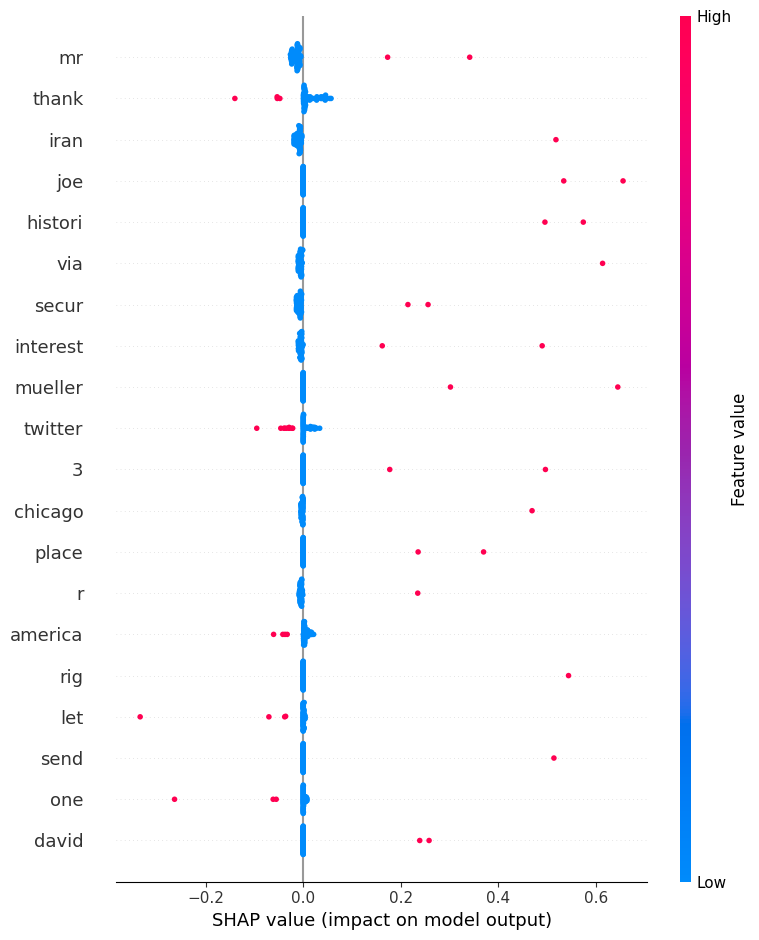

In [19]:
shap.summary_plot(shap_values[:, :, 0], X_test[:NUM_TWEETS], feature_names=features_names)

In [23]:
shap.force_plot(explainer.expected_value[0], shap_values[0, :, 0], X_test[0], feature_names=features_names)

AttributeError: 'Permutation' object has no attribute 'expected_value'